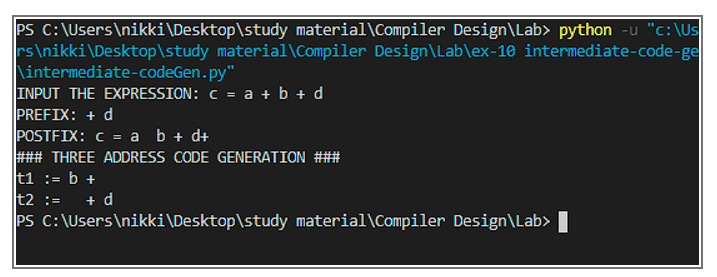

In [ ]:
OPERATORS = set(['+', '-', '*', '/', '(', ')'])
PRI = {'+':1, '-':1, '*':2, '/':2}

### INFIX ===> POSTFIX ###
def infix_to_postfix(formula):
    stack = [] # only pop when the coming op has priority 
    output = ''
    for ch in formula:
        if ch not in OPERATORS:
            output += ch
        elif ch == '(':
            stack.append('(')
        elif ch == ')':
            while stack and stack[-1] != '(':
                output += stack.pop()
            stack.pop() # pop '('
        else:
            while stack and stack[-1] != '(' and PRI[ch] <= PRI[stack[-1]]:
                output += stack.pop()
            stack.append(ch)
    # leftover
    while stack: 
    	output += stack.pop()
    print(f'POSTFIX: {output}')
    return output

### INFIX ===> PREFIX ###
def infix_to_prefix(formula):
    op_stack = []
    exp_stack = []
    for ch in formula:
        if not ch in OPERATORS:
            exp_stack.append(ch)
        elif ch == '(':
            op_stack.append(ch)
        elif ch == ')':
            while op_stack[-1] != '(':
                op = op_stack.pop()
                a = exp_stack.pop()
                b = exp_stack.pop()
                exp_stack.append( op+b+a )
            op_stack.pop() # pop '('
        else:
            while op_stack and op_stack[-1] != '(' and PRI[ch] <= PRI[op_stack[-1]]:
                op = op_stack.pop()
                a = exp_stack.pop()
                b = exp_stack.pop()
                exp_stack.append( op+b+a )
            op_stack.append(ch)
    
    # leftover
    while op_stack:
        op = op_stack.pop()
        a = exp_stack.pop()
        b = exp_stack.pop()
        exp_stack.append( op+b+a )
    print(f'PREFIX: {exp_stack[-1]}')
    return exp_stack[-1]

### THREE ADDRESS CODE GENERATION ###
def generate3AC(pos):
	print("### THREE ADDRESS CODE GENERATION ###")
	exp_stack = []
	t = 1
	
	for i in pos:
		if i not in OPERATORS:
			exp_stack.append(i)
		else:
			print(f't{t} := {exp_stack[-2]} {i} {exp_stack[-1]}')
			exp_stack=exp_stack[:-2]
			exp_stack.append(f't{t}')
			t+=1

expres = input("INPUT THE EXPRESSION: ")
pre = infix_to_prefix(expres)
pos = infix_to_postfix(expres)
generate3AC(pos)